In [1]:
import pooch
POOCH = pooch.create(
    path=pooch.os_cache("noaa-data"),
    # Use the figshare DOI
    base_url="doi:10.5281/zenodo.5553029/",
    registry={
        "HEADERS.txt": "md5:2a306ca225fe3ccb72a98953ded2f536",
        "CRND0103-2016-NY_Millbrook_3_W.txt": "md5:eb69811d14d0573ffa69f70dd9c768d9",
        "CRND0103-2017-NY_Millbrook_3_W.txt": "md5:b911da727ba1bdf26a34a775f25d1088",
        "CRND0103-2018-NY_Millbrook_3_W.txt": "md5:5b61bc687261596eba83801d7080dc56",
        "CRND0103-2019-NY_Millbrook_3_W.txt": "md5:9b814430612cd8a770b72020ca4f2b7d",
        "CRND0103-2020-NY_Millbrook_3_W.txt": "md5:cd8de6d5445024ce35fcaafa9b0e7b64"
    },
)


import pandas as pd

with open(POOCH.fetch("HEADERS.txt")) as fp:
    data = fp.read()
lines = data.split('\n')
headers = lines[1].split(' ')

dframes = []
for year in range(2016, 2019):
    fname = f'CRND0103-{year}-NY_Millbrook_3_W.txt'               
    df = pd.read_csv(POOCH.fetch(fname), parse_dates=[1],
                     names=headers, header=None, sep='\s+',
                     na_values=[-9999.0, -99.0])
    dframes.append(df)

df = pd.concat(dframes)
df = df.set_index('LST_DATE')
df

#########################################################
#### BELOW ARE THE VARIABLES YOU SHOULD USE IN THE PLOTS!
#### (numpy arrays)  
#### NO PANDAS ALLOWED!
#########################################################

t_daily_min = df.T_DAILY_MIN.values
t_daily_max = df.T_DAILY_MAX.values
t_daily_mean = df.T_DAILY_MEAN.values
p_daily_calc = df.P_DAILY_CALC.values
soil_moisture_5 = df.SOIL_MOISTURE_5_DAILY.values
soil_moisture_10 = df.SOIL_MOISTURE_10_DAILY.values
soil_moisture_20 = df.SOIL_MOISTURE_20_DAILY.values
soil_moisture_50 = df.SOIL_MOISTURE_50_DAILY.values
soil_moisture_100 = df.SOIL_MOISTURE_100_DAILY.values
date = df.index.values

In [2]:
units = lines[2].split(' ')
for name, unit in zip(headers, units):
    print(f'{name}: {unit}')

WBANNO: XXXXX
LST_DATE: YYYYMMDD
CRX_VN: XXXXXX
LONGITUDE: Decimal_degrees
LATITUDE: Decimal_degrees
T_DAILY_MAX: Celsius
T_DAILY_MIN: Celsius
T_DAILY_MEAN: Celsius
T_DAILY_AVG: Celsius
P_DAILY_CALC: mm
SOLARAD_DAILY: MJ/m^2
SUR_TEMP_DAILY_TYPE: X
SUR_TEMP_DAILY_MAX: Celsius
SUR_TEMP_DAILY_MIN: Celsius
SUR_TEMP_DAILY_AVG: Celsius
RH_DAILY_MAX: %
RH_DAILY_MIN: %
RH_DAILY_AVG: %
SOIL_MOISTURE_5_DAILY: m^3/m^3
SOIL_MOISTURE_10_DAILY: m^3/m^3
SOIL_MOISTURE_20_DAILY: m^3/m^3
SOIL_MOISTURE_50_DAILY: m^3/m^3
SOIL_MOISTURE_100_DAILY: m^3/m^3
SOIL_TEMP_5_DAILY: Celsius
SOIL_TEMP_10_DAILY: Celsius
SOIL_TEMP_20_DAILY: Celsius
SOIL_TEMP_50_DAILY: Celsius
SOIL_TEMP_100_DAILY: Celsius
: 


## Graph 1, 2, 3

In [48]:
import numpy as np
from matplotlib import pyplot as plt

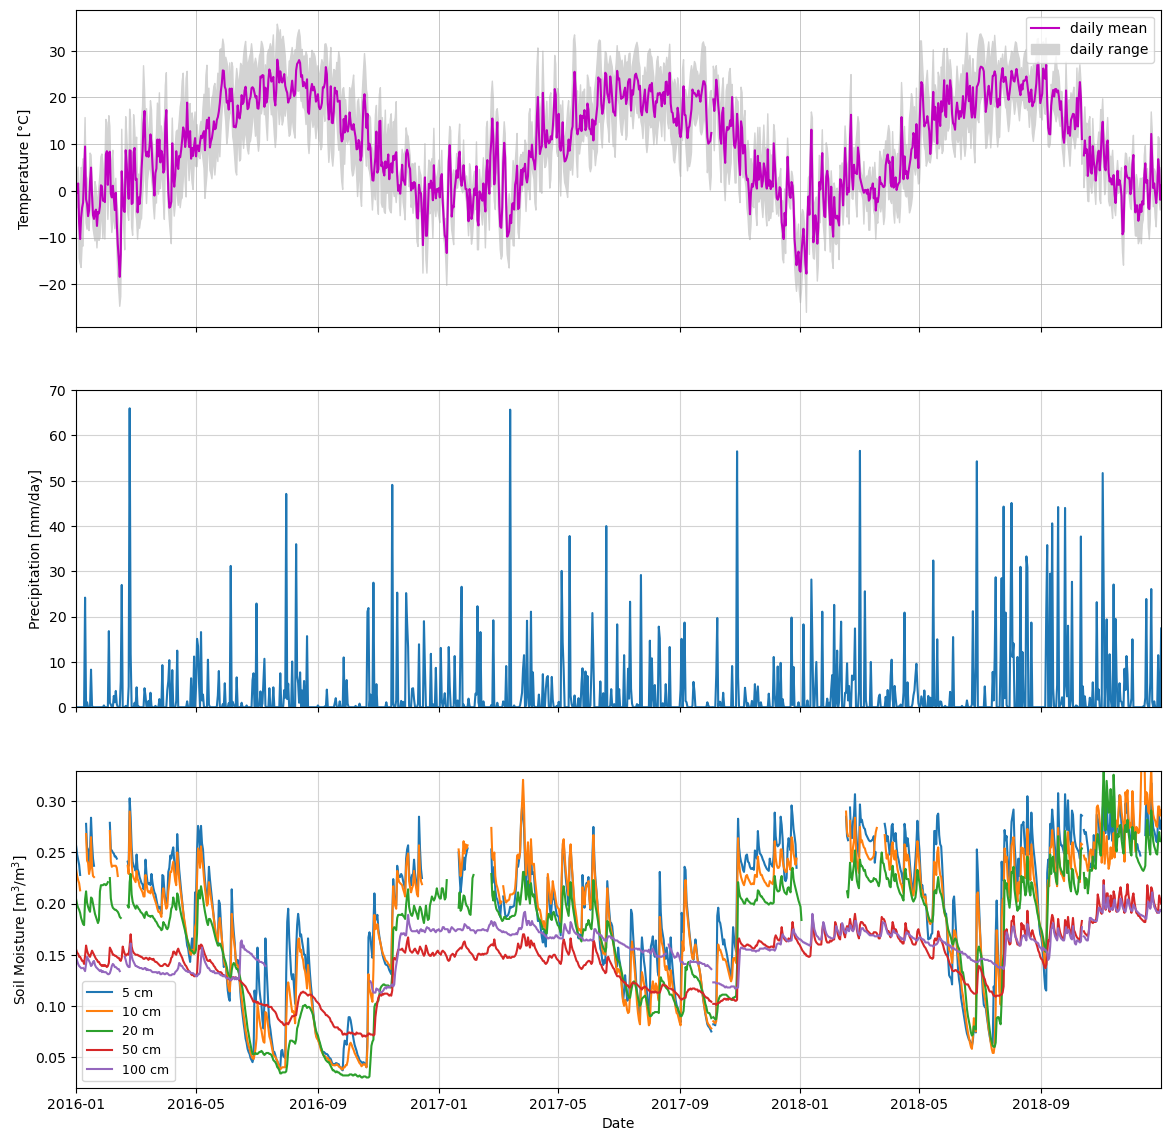

In [70]:
fig, ax = plt.subplots(nrows = 3, figsize = (14,14), sharex = True)

ax[0].plot(date,t_daily_mean, label = "daily mean", color='m')
ax[0].fill_between(date, y1 = t_daily_max, y2 = t_daily_min, color='lightgray', label = "daily range")
ax[0].grid(which='major', linewidth=0.5) 
ax[0].set_ylabel('Temperature [\u00b0C]')
ax[0].margins (x=0)
ax[0].legend(loc = "upper right")

ax[1].plot(date, p_daily_calc)
ax[1].grid(color = "lightgray")
ax[1].set_ylabel("Precipitation [mm/day]")
ax[1].axes.set_ylim(0,70)
ax[1].margins(x=0)

ax[2].plot(date,soil_moisture_5, label = "5 cm")
ax[2].plot(date,soil_moisture_10, label = "10 cm")
ax[2].plot(date,soil_moisture_20, label = "20 m")
ax[2].plot(date,soil_moisture_50, label = "50 cm")
ax[2].plot(date,soil_moisture_100, label = "100 cm")
ax[2].grid(color = "lightgray")
ax[2].set_xlabel('Date')
ax[2].set_ylabel('Soil Moisture [m$^3$/m$^3$]')
ax[2].legend(loc = "lower left", fontsize = 9)
ax[2].axes.set_ylim(0.02,0.33)
ax[2].margins(x=0)